In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Making dataset

Text(0.5, 1.0, 'data plot')

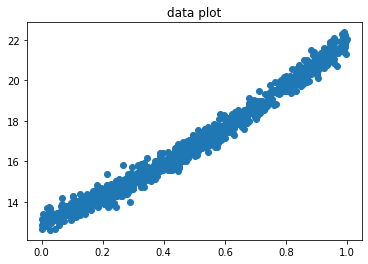

In [ ]:
np.random.seed(2)
x = np.random.rand(1000)

y = 3*x*x + 6*x + 13
y = y + np.random.normal(0, 0.3, y.shape)

plt.scatter(x, y)
plt.title('data plot')

# Model

In [ ]:
def loss(y, y_pred):
  return np.sum(y-y_pred)**7 / len(y)

def model(x, y, alpha):
  np.random.seed(2)
  th = np.random.rand(3)
  losses = []
  dth = np.zeros(3)
  
  for i in range(50000):
    y_pred = th[2]*x*x + th[1]*x + th[0]
    losses.append(loss(y, y_pred))
    
    dth[2] = (-7 / len(y)) * np.sum(np.multiply((y - y_pred)**6, x**2))
    dth[1] = (-7 / len(y)) * np.sum(np.multiply((y - y_pred)**6, x))
    dth[0] = (-7 / len(y)) * np.sum((y - y_pred)**6)
    for i in range(3):
      th[i] -= alpha*dth[i]

  return th, losses

# Analysis

loss:  106393089.71124716


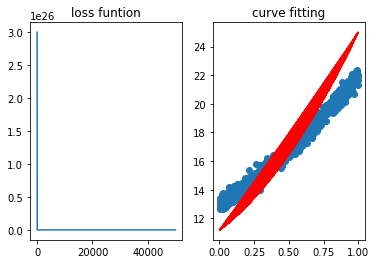

In [ ]:
coeffs, losses = model(x, y, 5.6*(10**-8))

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(50000), losses)
axis[0].set_title('loss funtion')

y_pred = coeffs[2]*x*x + coeffs[1]*x + coeffs[0]
axis[1].scatter(x, y)
axis[1].plot(x, y_pred, color='red')
axis[1].set_title('curve fitting')

print('loss: ', loss(y, y_pred))